In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sn

In [2]:
df = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IBM_Student Alcohol Consumption\student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# To convert Categorical variables into numeric form

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason','address','nursery','higher','Medu','Fedu','address'])

df['alc'] = df[['Dalc','Walc']].sum(axis=1)
df['Gavg'] = df[['G1','G2','G3']].sum(axis=1)
df.head()

,sex,age,famsize,Pstatus,guardian,traveltime,studytime,failures,schoolsup,famsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Gavg
0,0,18,1,0,0,2,2,0,1,0,...,4,1,1,3,6,5,6,6,2,17
1,0,17,1,1,1,1,2,0,0,1,...,3,1,1,3,4,5,5,6,2,16
2,0,15,0,1,0,1,2,3,1,0,...,2,2,3,3,10,7,8,10,5,25
3,0,15,1,1,0,1,3,0,0,1,...,2,1,1,5,2,15,14,15,2,44
4,0,16,1,1,1,1,2,0,0,1,...,2,1,2,5,4,6,10,10,3,26


In [4]:
X = df.loc(axis=1)['sex','age','famsize','Pstatus','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','internet','romantic','famrel','freetime','health','absences','alc'].values
X.shape
X

array([[ 0, 18,  1, ...,  3,  6,  2],
       [ 0, 17,  1, ...,  3,  4,  2],
       [ 0, 15,  0, ...,  3, 10,  5],
       ...,
       [ 1, 21,  1, ...,  3,  3,  6],
       [ 1, 18,  0, ...,  5,  0,  7],
       [ 1, 19,  0, ...,  5,  5,  6]], dtype=int64)

In [5]:
y = df.iloc[:,-1].values
y.shape
y

array([17, 16, 25, 44, 26, 45, 35, 17, 53, 44, 27, 34, 42, 31, 46, 42, 41,
       28, 16, 28, 42, 42, 46, 38, 27, 23, 35, 46, 33, 33, 32, 50, 49, 30,
       41, 21, 49, 46, 35, 40, 28, 36, 55, 27, 29, 22, 34, 58, 44, 21, 38,
       37, 32, 29, 36, 27, 44, 44, 28, 47, 32, 29, 27, 28, 30, 46, 38, 20,
       25, 48, 43, 30, 19, 38, 34, 28, 32, 33, 26, 15, 34, 32, 19, 45, 29,
       24, 21, 41, 31, 21, 22, 51, 19, 31, 38, 27, 41, 27, 39, 24, 19, 50,
       37, 19, 52, 32, 23, 52, 36, 45, 56, 27, 36, 56, 27, 46, 38, 40, 24,
       40, 46, 45, 39, 38, 23, 38, 28, 24, 11, 54, 12,  8, 35, 34,  9, 11,
       10,  4, 38, 47, 16, 27, 31, 41,  5, 30, 13, 32, 13, 27, 11, 39, 30,
        5, 34, 27, 41, 27, 47, 34, 13, 21,  7, 30, 20, 35, 30, 45, 13, 42,
       11, 44, 34, 15, 30, 28, 37, 17, 27, 31, 25, 37, 50, 26, 37, 35, 34,
       45, 24, 27, 36, 25, 23, 27, 41, 44, 48, 28, 54, 28, 48, 28, 28, 19,
       31, 28, 21, 36, 28, 21, 24, 37, 39, 21, 28, 44, 16, 20, 22, 29, 18,
       11, 49, 38, 40, 24

In [6]:
# Splitting data into training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
# Feature scaling or normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.07222193, -0.51393668, -1.5484991 , ...,  1.02757019,
        -0.67465822,  1.11964032],
       [-0.93264274,  1.89800379,  0.64578662, ..., -1.11810501,
        -0.67465822,  0.60983291],
       [ 1.07222193, -1.31791684,  0.64578662, ..., -0.40287994,
        -0.43170437, -0.4097819 ],
       ...,
       [-0.93264274, -1.31791684,  0.64578662, ...,  1.02757019,
        -0.43170437,  1.11964032],
       [ 1.07222193, -0.51393668,  0.64578662, ..., -1.11810501,
         0.54011099,  0.1000255 ],
       [ 1.07222193, -0.51393668,  0.64578662, ...,  1.02757019,
         0.17568023, -0.91958931]])

In [8]:
# Training the KNN model with K = 5 for first instance

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Predictions of the KNN model with K = 5 for first instance

y_pred = classifier.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

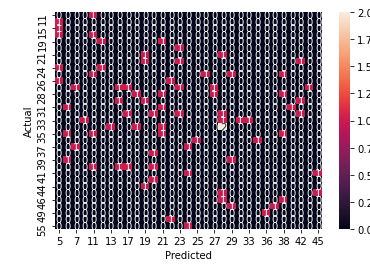

In [10]:
# Evaluating the performance of our KNN classifier model using a confusion matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames =  ['Actual'], colnames = ['Predicted'])
sn.heatmap(confusion_matrix, annot = True)

In [11]:
# Training the classifier to find the best value of K

from sklearn import metrics
scores = {}
scores_list = []
for k in range(1,100):
  classifier1 = KNeighborsClassifier(n_neighbors = k)
  classifier1.fit(X_train, y_train)
  y_pred1 = classifier1.predict(X_test)
  temp = metrics.accuracy_score(y_test, y_pred1)
  scores[k] = temp
  scores_list.append(temp)

Text(0, 0.5, 'Testing Accuracy')

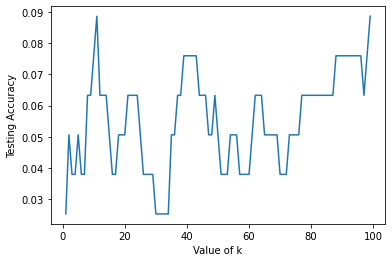

In [12]:
k_range = range(1,100)
plt.plot(k_range, scores_list)
plt.xlabel('Value of k')
plt.ylabel('Testing Accuracy')

In [13]:
acc = accuracy_score(y_test, y_pred)
acc

0.05063291139240506

In [14]:
classifier.score(X_test, y_test)

0.05063291139240506